In [26]:
import os 
import cv2  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
 
import tensorflow as tf 
from tensorflow.keras import layers,models,optimizers 
from tensorflow import keras 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 

from sklearn.utils import shuffle  
import random  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import load_model 
import imgaug.augmenters as iaa


In [27]:
dataset_path="D:\ML\Image Classification\Training"
img_size=250 
 
train_data=[] 
train_labels=[]  
train_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    train_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    train_paths.append(img_path) 
    img = cv2.imread(img_path)  
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue  # skip this iteration if image not loaded
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    train_data.append([img,img_class])


   


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_19840\2046990827.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Training"


In [28]:
dataset_path="D:\ML\Image Classification\Testing"
img_size=250 
 
test_data=[] 
test_labels=[]  
test_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    test_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    test_paths.append(img_path) 
    img=cv2.imread(img_path) 
    if img is None: 
        print(f"Failed to load image: {img_path}") 
        continue
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    test_data.append([img,img_class])


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_19840\688692814.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Testing"


DATA VISUALIZATION 


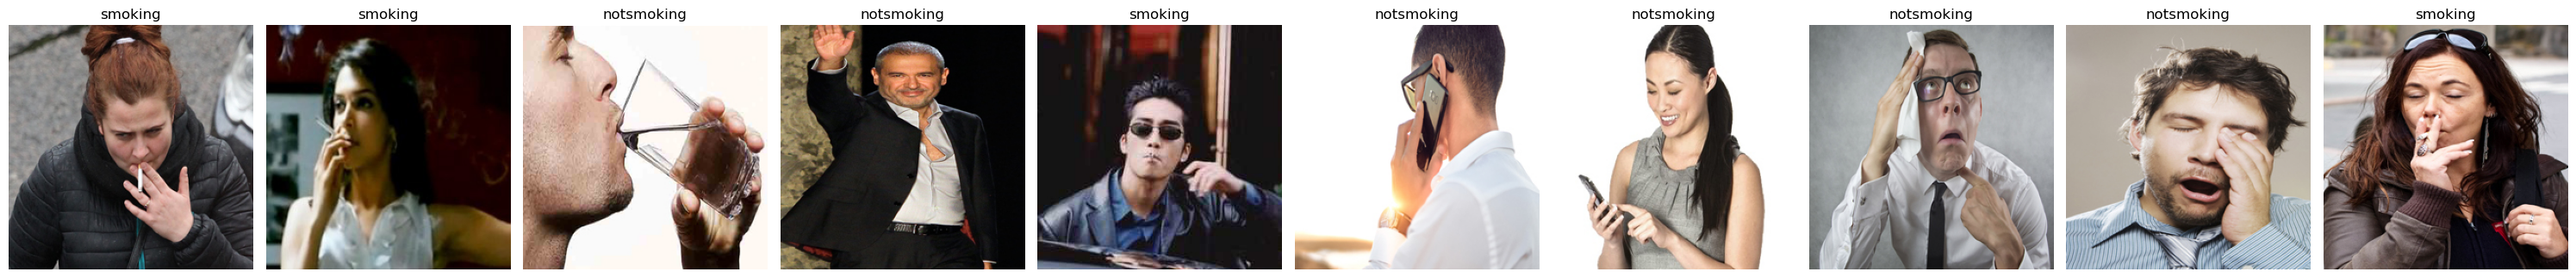

In [29]:
def display_random_images(images,labels,num_images=10): 
    num_total_images=len(images) 
    if num_total_images == 0:
        print("No images to display.")
        return 
    random_indices=np.random.choice(num_total_images,size=num_images,replace=False) 

    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(random_indices): 
        axes[i].imshow(images[idx][0]) 
        axes[i].set_title(labels[idx]) 
        axes[i].axis('off') 
    plt.tight_layout() 
    plt.show() 
     
display_random_images(train_data,train_labels)


DATA PREPROCESSING

In [30]:
random.shuffle(train_data) 
random.shuffle(test_data) 


In [31]:
X_train, X_test, y_train, y_test = [], [], [], []

def extract_splits(data, target='train'):
    for features, label in data:
        if target == 'train':
            X_train.append(features)
            y_train.append(label)
        else:
            X_test.append(features)
            y_test.append(label)



In [ ]:
extract_splits(train_data, target='train')

In [ ]:
extract_splits(test_data, target='test')

In [34]:
X_train=np.array(X_train)  
X_test=np.array(X_test)
 
y_train=np.array(y_train) 
y_test=np.array(y_test)

In [35]:
print("X_train shape",X_train.shape)  
print("X_test shape",X_test.shape)  

print("y_train shape",y_train.shape)  
print("y_test shape",y_test.shape) 


X_train shape (716, 250, 250, 3)
X_test shape (224, 250, 250, 3)
y_train shape (716,)
y_test shape (224,)


In [36]:
label_encoder=LabelEncoder() 
y_train_encoded=label_encoder.fit_transform(y_train) 
y_test_encoded=label_encoder.fit_transform(y_test) 

In [37]:
y_train_encoded

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

IMAGE AUGMENTATION

In [38]:
def display_seq_images(images,labels,num_images=5): 
    num_total_images=len(images) 
    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(range(num_images)): 
      axes[i].imshow(images[idx],aspect='auto') 
      axes[i].set_title(labels[idx]) 
      axes[i].axis('off') 
    plt.tight_layout() 
    plt.show()

In [39]:
def augment_images(images,labels,num_augmentations=4): 
    augmented_images=[] 
    augmented_labels=[] 
     
    seq=iaa.Sequential([
        iaa.Fliplr(1.0),                        ##Horizontal flip with 100% probability 
        iaa.Multiply((1.5,2.5),per_channel=0.5)])    ##Adjust Saturation 
    
    ##Apply augmentation to each image  
    for original_image,label in zip(images,labels): 
        augmented_images.append(original_image) 
        augmented_labels.append(label) 

        augmented_images.extend(seq(images=[original_image]*(num_augmentations))) 
        augmented_labels.extend([label]*(num_augmentations)) 
    return np.array(augmented_images),np.array(augmented_labels) 

num_augmentations=4 
 
augmented_images,augmented_labels=augment_images(X_train,y_train_encoded,num_augmentations)

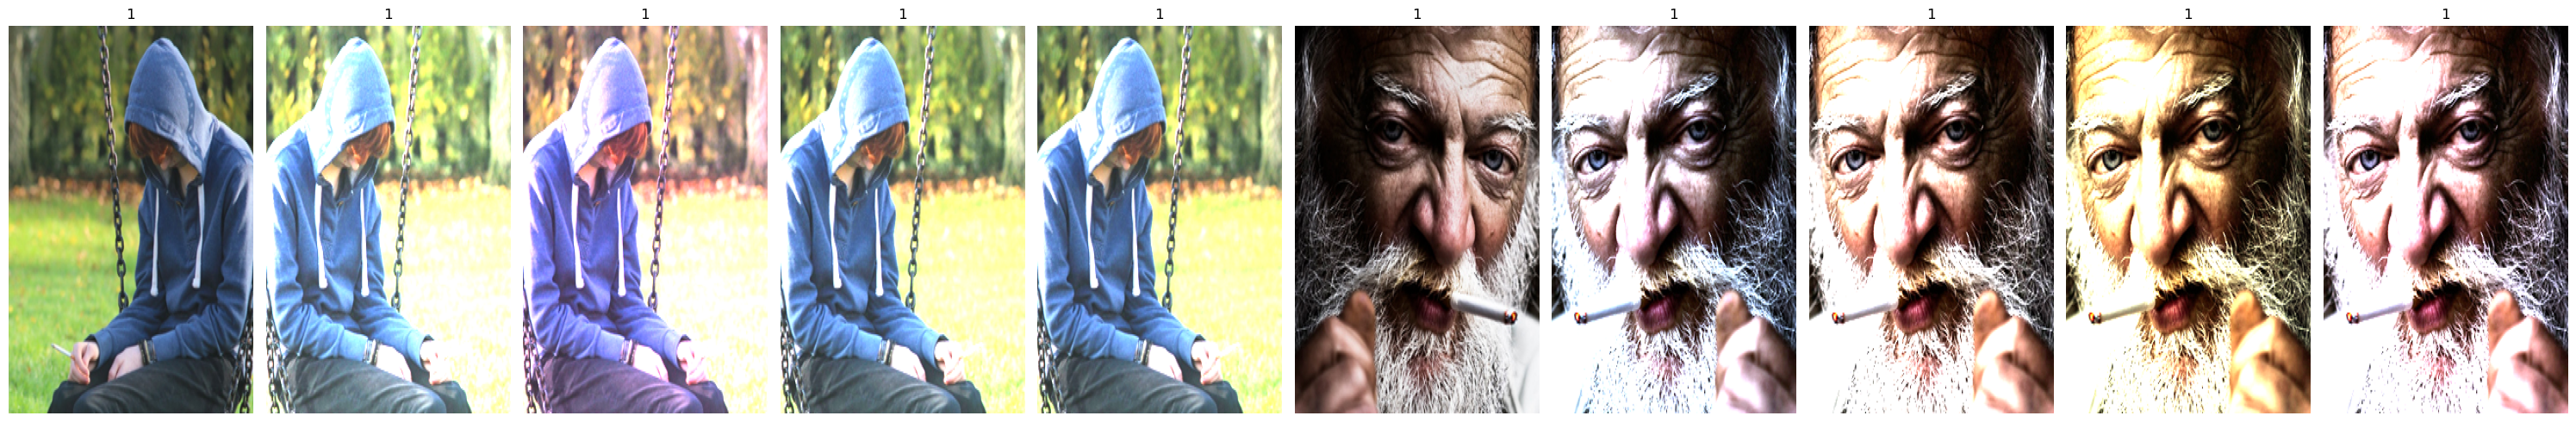

In [40]:
display_seq_images(augmented_images,augmented_labels,10)

Model Building 


In [ ]:
preprocess_input=keras.applications.vgg19.preprocess_input 


In [42]:
img_shape=augmented_images[0].shape
base_model=keras.applications.VGG16( 
    input_shape=img_shape, 
    include_top=False, 
    weights="imagenet",
)
base_model.trainable=False 
base_model.summary()
  

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 250, 250, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 250, 250, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 62, 62, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
##Build model on top of the pre trained base 
model=models.Sequential([  
    base_model, 
    layers.GlobalAveragePooling2D(), 
    layers.Dropout(0.5), 
    layers.Dense(512,activation = 'relu'), 
    layers.Dropout(0.5), 
    layers.Dense(2,activation='softmax')
])

In [44]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model Training 

In [45]:
history=model.fit(augmented_images,augmented_labels,epochs=10,batch_size=64,validation_data=(X_test,y_test_encoded))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 695s 12s/step - accuracy: 0.6393 - loss: 3.0874 - val_accuracy: 0.7455 - val_loss: 1.0011
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 743s 13s/step - accuracy: 0.7416 - loss: 1.2452 - val_accuracy: 0.7634 - val_loss: 0.5213
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 658s 12s/step - accuracy: 0.7580 - loss: 0.7189 - val_accuracy: 0.7991 - val_loss: 0.4463
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 651s 12s/step - accuracy: 0.7807 - loss: 0.5450 - val_accuracy: 0.7411 - val_loss: 0.4974
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 655s 12s/step - accuracy: 0.7865 - loss: 0.4763 - val_accuracy: 0.7679 - val_loss: 0.4791
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 657s 12s/step - accuracy: 0.7974 - loss: 0.4300 - val_accuracy: 0.7812 - val_loss: 0.4636
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 673s 12s/step - accuracy: 0.8198 - loss: 0.4075 - val_accuracy: 0.7545 - val_loss: 0.4672
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 561s 10s/step - accuracy: 0.8383 - loss: 0.3669 - val_accuracy: 0.

Model Evaluation 


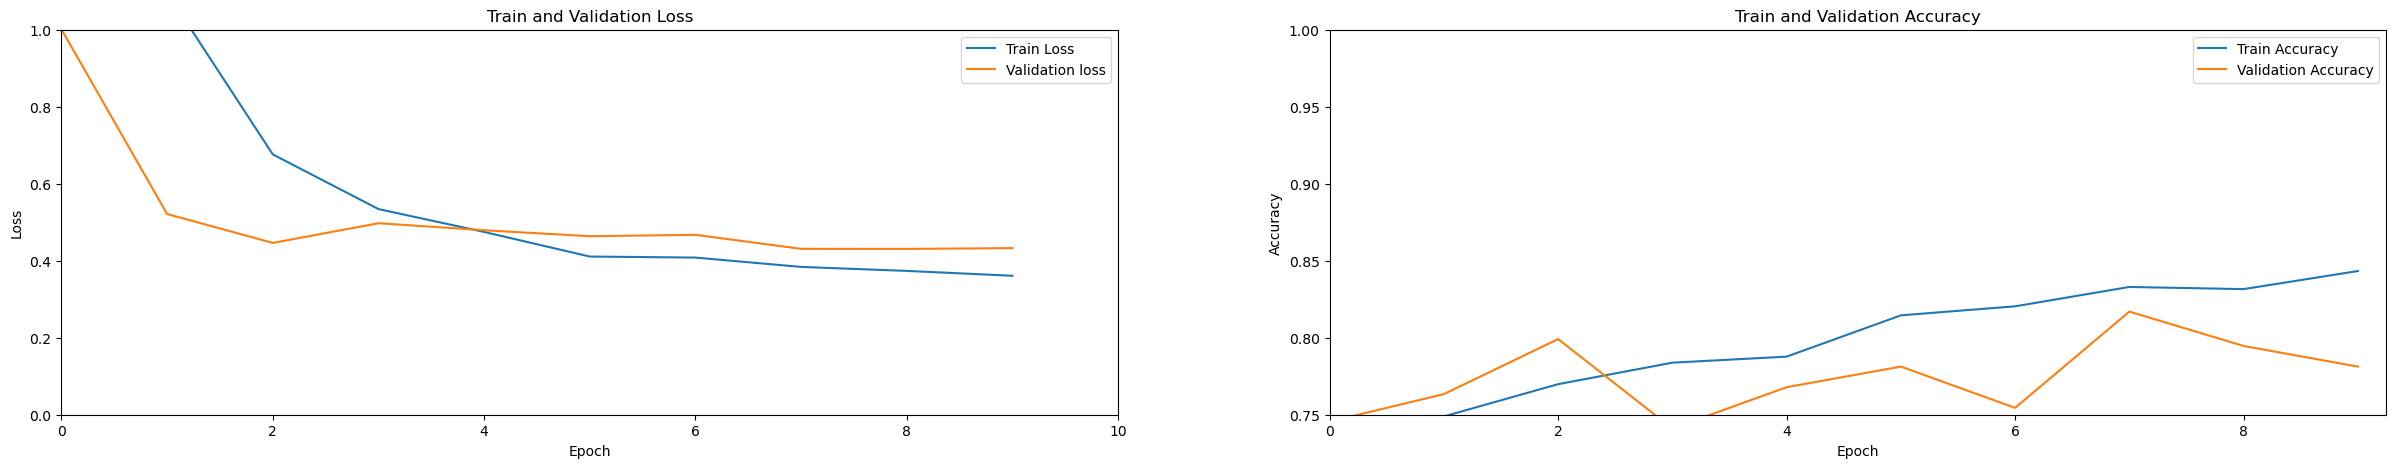

In [48]:
plt.figure(figsize=(30,5)) 
plt.subplot(1,2,1) 
plt.title("Train and Validation Loss") 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.plot(history.history['loss'],label="Train Loss") 
plt.plot(history.history['val_loss'],label="Validation loss")
plt.xlim(0,10) 
plt.ylim(0.0,1.0)  
plt.legend() 



plt.subplot(1,2,2) 
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 
plt.plot(history.history['accuracy'],label="Train Accuracy") 
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")  
plt.xlim(0,9.25) 
plt.ylim(0.75,1.0) 
plt.legend() 
plt.show()



In [49]:
result=model.evaluate(X_test,y_test_encoded) 
 
print("Accuracy Score",result[1]*100) 


7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.7635 - loss: 0.4435
Accuracy Score 78.125


In [50]:
##Prediction  

y_pred=np.argmax(model.predict(X_test),axis=1) 
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report 
 
print("Accuracy Score : {:.2f}%".format(accuracy_score(y_test_encoded,y_pred)*100))  
print("Precision Score : {:.2f}%".format(precision_score(y_test_encoded,y_pred)*100))  
print("Recall Score : {:.2f}%".format(recall_score(y_test_encoded,y_pred)*100))  
print("F1 Score : {:.2f}%".format(f1_score(y_test_encoded,y_pred)*100))  
print("AUC Score : {:.2f}%".format(roc_auc_score(y_test_encoded,y_pred)*100)) 


Accuracy Score : 78.12%
Precision Score : 70.86%
Recall Score : 95.54%
F1 Score : 81.37%
AUC Score : 78.12%


In [52]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       112
           1       0.71      0.96      0.81       112

    accuracy                           0.78       224
   macro avg       0.82      0.78      0.77       224
weighted avg       0.82      0.78      0.77       224



Plotting Confusion Matrix

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay  

cm=confusion_matrix(y_test_encoded,y_pred) 
cm

array([[ 68,  44],
       [  5, 107]], dtype=int64)

<Axes: >

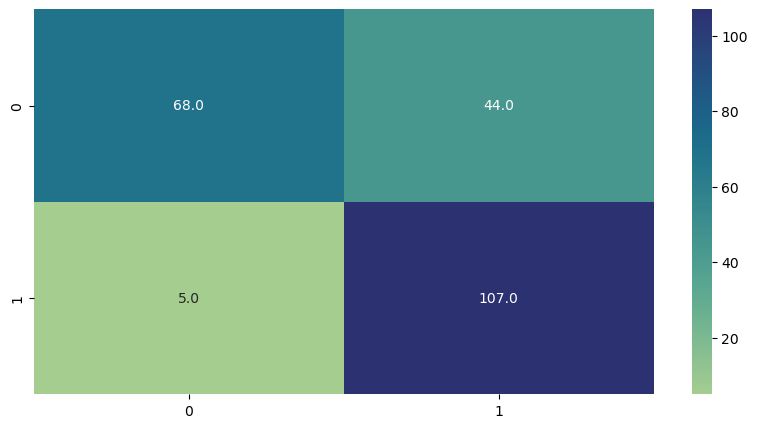

In [54]:
import seaborn as sns 
plt.figure(figsize=(10,5)) 
 
sns.heatmap(cm,annot=True,fmt=".1f",cmap="crest")